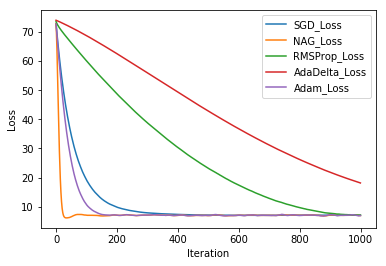

In [1]:
# -*- coding: utf-8 -*-
"""
"""

from numpy import *;
import numpy as np
import random
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_data(filePath):
    data = load_svmlight_file(filePath)
    return data[0], data[1]

def deriate(X_train,y_train,randomNum,w,n):
    a=1-multiply(y_train[randomNum,:],X_train[randomNum,:]*w)
    a[a>=0]=1
    a[a<0]=0
    return w+(multiply(a,multiply(y_train[randomNum,:],X_train[randomNum,:])).sum(0)/len(randomNum)).T

def getTest(X_test,y_test,w,C):
    a=1-multiply(y_test,X_test*w)
    a[a<=0]=0
    return multiply(w,w).sum(0)/2+C*a.sum(0)/len(y_test)

def SGD(X_train,y_train,X_test,y_test,w_SGD,randomNum,k,n):
    w_SGD=w_SGD-k*deriate(X_train,y_train,randomNum,w_SGD,n)
    yTest_SGD=getTest(X_test,y_test,w_SGD,C)
    return w_SGD,yTest_SGD

def NAG(X_train,y_train,X_test,y_test,w_NAG,vNAG,l_NAG,randomNum,k,n):
    g=deriate(X_train,y_train,randomNum,w_NAG-l_NAG*vNAG,n)
    vNAG=l_NAG*vNAG+k*g
    w_NAG=w_NAG-vNAG
    yTest_NAG=getTest(X_test,y_test,w_NAG,C)
    return w_NAG,vNAG,yTest_NAG

def RMSProp(X_train,y_train,X_test,y_test,w_RMSProp,vRMSProp,l_RMSProp,randomNum,k1,n):
    g=deriate(X_train,y_train,randomNum,w_RMSProp,n)
    vRMSProp=l_RMSProp*vRMSProp+(1-l_RMSProp)*multiply(g,g)
    w_RMSProp=w_RMSProp-multiply((k_RMSProp/sqrt(vRMSProp+k1)),g)
    yTest_RMSProp=getTest(X_test,y_test,w_RMSProp,C)
    return w_RMSProp,vRMSProp,yTest_RMSProp

def AdaDelta(X_train,y_train,X_test,y_test,w_AdaDelta,vAdaDelta,l_AdaDelta,deltaT,randomNum,k1,n):
    g=deriate(X_train,y_train,randomNum,w_AdaDelta,n)
    vAdaDelta=l_AdaDelta*vAdaDelta+(1-l_AdaDelta)*multiply(g,g)
    thelta=-multiply((sqrt(deltaT+k1)/sqrt(vAdaDelta+k1)),g)
    w_AdaDelta=w_AdaDelta+thelta
    deltaT=l_AdaDelta*deltaT+(1-l_AdaDelta)*multiply(thelta,thelta)
    yTest_AdaDelta=getTest(X_test,y_test,w_AdaDelta,C)
    return w_AdaDelta,vAdaDelta,deltaT,yTest_AdaDelta

def Adam(X_train,y_train,X_test,y_test,w_Adam,vAdam,l_Adam,beta,m,randomNum,k1,n):
    g=deriate(X_train,y_train,randomNum,w_Adam,n)
    vAdam=l_Adam*vAdam+(1-l_Adam)*multiply(g,g)
    m=beta*m+(1-beta)*g
    a=k_Adam*(sqrt(1-l_Adam**(i+1))/(1-beta**(i+1)))
    w_Adam=w_Adam-a*m/(sqrt(vAdam+k1))
    yTest_Adam=getTest(X_test,y_test,w_Adam,C)
    return w_Adam,vAdam,m,yTest_Adam



X_train, y_train = get_data("a9a.txt")
X_test, y_test = get_data("a9a.t")
X_train=X_train.toarray()
X_test=X_test.toarray()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_test=mat(np.c_[X_test,np.zeros((len(X_test),1))])
X_train=mat(np.c_[np.ones(len(X_train)),X_train])
X_test=mat(np.c_[np.ones(len(X_test)),X_test])
y_train=mat(y_train).T
y_test=mat(y_test).T

n=128
k=0.01
k1=1e-8
k_RMSProp=0.001
k_Adam=0.01
l_RMSProp=0.9
l_NAG=0.9
l_AdaDelta=0.9
l_Adam=0.999

beta=0.9
C=1

x=[]
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]

w=mat(np.ones((X_train.shape[1],1)))
w_Adam=w.copy()
w_AdaDelta=w.copy()
w_RMSProp=w.copy()
w_NAG=w.copy()
w_SGD=w.copy()
vNAG=mat(np.zeros((X_train.shape[1],1)))
vRMSProp=vNAG.copy()
vAdaDelta=vNAG.copy()
vAdam=vNAG.copy()
deltaT=vNAG.copy()
m=vNAG.copy()

for i in range(1000):
    randomNum=random.sample(range(len(X_train)),n)
    
    w_SGD,yTest_SGD=SGD(X_train,y_train,X_test,y_test,w_SGD,randomNum,k,n)
    
    w_NAG,vNAG,yTest_NAG=NAG(X_train,y_train,X_test,y_test,w_NAG,vNAG,l_NAG,randomNum,k,n)
    
    w_RMSProp,vRMSProp,yTest_RMSProp=RMSProp(X_train,y_train,X_test,y_test,w_RMSProp,vRMSProp,l_RMSProp,randomNum,k1,n)
    
    w_AdaDelta,vAdaDelta,deltaT,yTest_AdaDelta=AdaDelta(X_train,y_train,X_test,y_test,w_AdaDelta,vAdaDelta,l_AdaDelta,deltaT,randomNum,k1,n)
    
    w_Adam,vAdam,m,yTest_Adam=Adam(X_train,y_train,X_test,y_test,w_Adam,vAdam,l_Adam,beta,m,randomNum,k1,n)
    
    x.append(i)
    
    y1.append(yTest_SGD[0,0])
    
    y2.append(yTest_NAG[0,0])
    
    y3.append(yTest_RMSProp[0,0])
    
    y4.append(yTest_AdaDelta[0,0])
    
    y5.append(yTest_Adam[0,0])
    
    
    
plt.figure(1)

plt.plot(x,y1, label='SGD_Loss')

plt.plot(x,y2, label='NAG_Loss')

plt.plot(x,y3, label='RMSProp_Loss')

plt.plot(x,y4, label='AdaDelta_Loss')

plt.plot(x,y5, label='Adam_Loss')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.show()